### Importing required libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import plotly.express as px

### Loading the Data

In [59]:
df = pd.read_csv('CreditCard.csv')
print(df.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

### Visualizing Data using pairplot

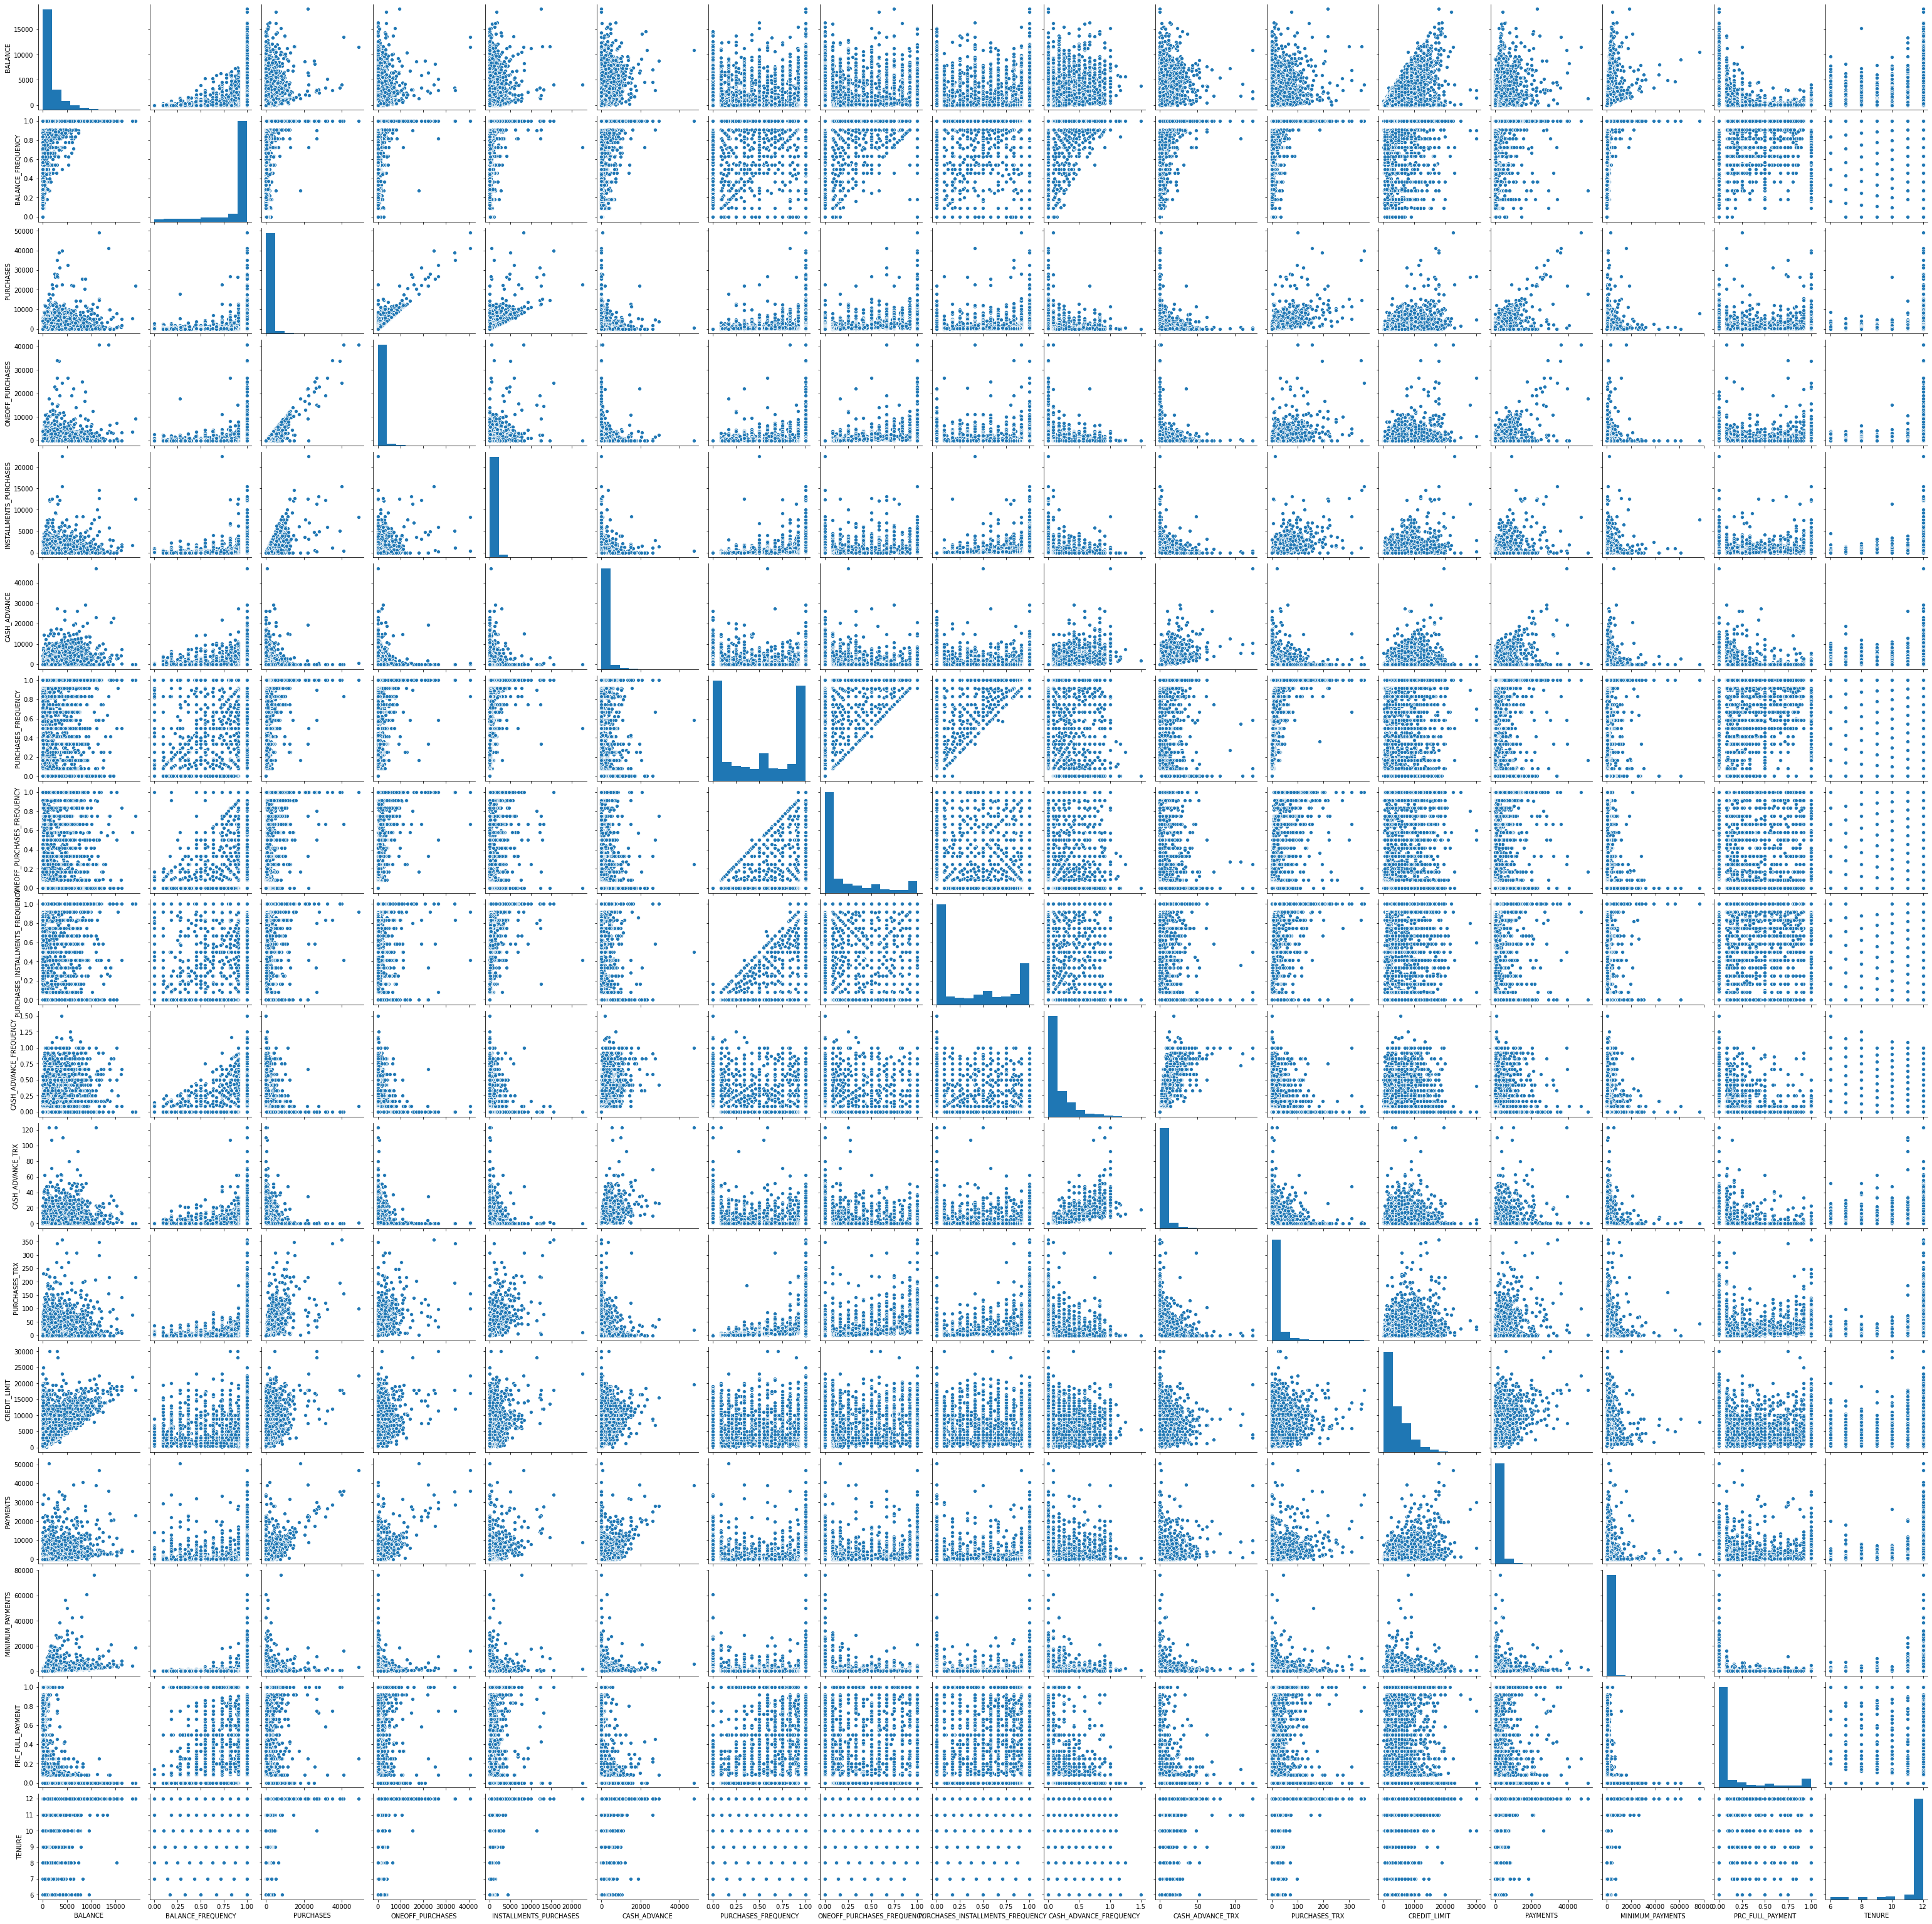

In [52]:
sns.pairplot(df)

### Preprocessing the Data for better Visualization

In [60]:
# scaling the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# normalizing the data

X_normalized = normalize(X_scaled)


# converting the numpy array into a pandas DataFrame

X_normalized = pd.DatOppsaFrame(X_normalized)

# reducing the dimensionality of the data

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)

# converting the numpy array into a pandas DataFrame

X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['P1', 'P2']

X_principal.head(7)

ValueError: could not convert string to float: 'C10001'

In [61]:
#checking for null value

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Opps! CUST_ID has string in its value and there are null values in data too, hence, lets get rid of it.

In [62]:
df = df.drop('CUST_ID', axis = 1)
df.fillna(method = 'ffill', inplace = True)

print (df)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

### Lets do Preprocessing the Data for better Visualization again

In [63]:
# scaling the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# normalizing the data

X_normalized = normalize(X_scaled)


# converting the numpy array into a pandas DataFrame

X_normalized = pd.DataFrame(X_normalized)

# reducing the dimensionality of the data

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)

# converting the numpy array into a pandas DataFrame

X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['P1', 'P2']

X_principal.head(7)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097610
4,-0.563512,-0.482506
5,0.336076,-0.235097
6,0.756178,0.388880


### Developing the clustering model

In [66]:
clusterer= SpectralClustering(n_clusters = 2, affinity = 'rbf')

# training the model and storing the predicted cluter labels

cluster_labels = clusterer.fit_predict(X_principal)

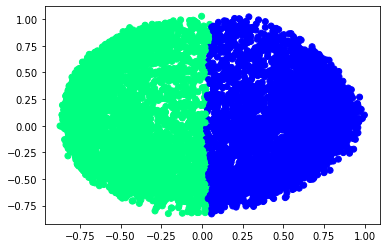

In [69]:
# Visualization of the clustering

plt.scatter(X_principal['P1'], X_principal['P2'],
            c = SpectralClustering(n_clusters = 2, affinity = 'rbf'). fit_predict(X_principal), cmap = plt.cm.winter)

plt.show()